# Heart Disease Classification Project

### Main Objective

The objective of the project is create a model that gives the best results predicting the target feature, we are going to use multiple metrics to check this (Accuracy, Precision, Recall, F1 Score and AUC) <BR>

The target data is not that much unbalanced, however we are going to explore the different configuration for the models, where they are going to be plain, weighted, weighted + SMOTE and weighted + Undersampling, this is done just in case there is a important change in the metrics 

### Importing the Libraries
 

In [82]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data

In [3]:
data = pd.read_csv('heart-disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There is no Null values in the dataset.

### About the Data
The dataset contains medical data for predicting heart disease.

### Columns
-  age: Age of the patient in years.<br>
-  sex: Sex of the patient (1 = male, 0 = female)<br>
-  cp: Chest pain type (1-4)<br>
-  trestbps: Resting blood pressure (in mm Hg on admission to the hospital)<br>
-  chol: Serum cholesterol in mg/dl<br>
-  fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)<br>
-  restecg: Resting electrocardiographic results (0-2)<br>
-  thalach: Maximum heart rate achieved<br>
-  exang: Exercise-induced angina (1 = yes; 0 = no)<br>
-  oldpeak: ST depression induced by exercise relative to rest<br>
-  target: wheather or not the patient has heart deases

### Functions to GrindSearchCV Models, Evaluate the results and Resample the data

In [ ]:
rs = 123

# Grind Search for Logistic Regression
def grid_search_lr(X_train, y_train):
    params_grid = {
    'class_weight': [{0:0.05, 1:0.95}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}, {0:0.4, 1:0.6}, {0:0.5, 1:0.5},]
    }
    lr_model = LogisticRegression(random_state=rs, max_iter=1000)
    grid_search = GridSearchCV(estimator = lr_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

# Grind Search for Random Forest
def grid_search_rf(X_train, y_train):
    params_grid = {
        'max_depth': [5, 10, 15, 20],
        'n_estimators': [25, 50, 100],
        'min_samples_split': [2, 5],
        'class_weight': [{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}, {0:0.4, 1:0.6}, {0:0.5, 1:0.5}]
    }
    rf_model = RandomForestClassifier(random_state=rs)
    grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

# Grind Search for KNN
def grid_search_knn(X_train, y_train):
    params_grid = {
        'n_neighbors': [2, 3, 4, 5],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto'],
        'leaf_size': [25, 30, 35, 40, 45],
        'p': [1, 2],
        'metric': ['euclidean', 'manhattan']
    }
    
    knn_model = KNeighborsClassifier()
    grid_search = GridSearchCV(estimator=knn_model,
                               param_grid=params_grid,
                               scoring='f1',
                               cv = 5, verbose=1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

# Grind Search for LinearSCV
def grid_seacrh_lsvc(X_train, y_train):
    params_grid = {
        'penalty': ['l1', 'l2'],
        'C': [1, 3, 5, 7, 9, 10, 12, 15],
        'class_weight': [{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}, {0:0.4, 1:0.6}, {0:0.5, 1:0.5}],
    }
    
    lscv_model = LinearSVC(random_state=rs, max_iter=2000)
    grid_search = GridSearchCV(estimator=lscv_model,
                                    param_grid=params_grid,
                                    scoring='f1',
                                    cv=5, verbose=1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

# Evaluate Accuracy, Precision, Recall, F1 Score, and AUC
def evaluate(y_test, preds):
    precision, recall, f_beta, support = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
    auc = roc_auc_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    print(f"Accuracy is: {accuracy:.2f}")
    print(f"Precision is: {precision:.2f}")
    print(f"Recall is: {recall:.2f}")
    print(f"Fscore is: {f_beta:.2f}")
    print(f"AUC is: {auc:.2f}")
    
# Resample data to SMOTE and Random UnderSample
def evaluate(yt, yp, eval_type="Original"):
    results_pos = {}
    results_pos['type'] = eval_type
    # Accuracy
    results_pos['accuracy'] = accuracy_score(yt, yp)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, beta=5, pos_label=1, average='binary')
    results_pos['recall'] = recall
    # AUC
    results_pos['auc'] = roc_auc_score(yt, yp)
    # Precision
    results_pos['precision'] = precision
    # Fscore
    results_pos['fscore'] = f_beta
    return results_pos

# Visualize the Results
def visualize_eval_metrics(results):
    df = pd.DataFrame(data=results)
    #table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    #                columns=['type'])
    #df = df.set_index('type').transpose()
    print(df)
    x = np.arange(5)
    original = df.iloc[0, 1:].values
    class_weight = df.iloc[1, 1:].values
    smote = df.iloc[2, 1:].values
    under = df.iloc[3, 1:].values
    width = 0.2
    plt.figure(figsize=(12, 10), dpi=80)
    plt.bar(x-0.2, original, width, color='#95a5a6')
    plt.bar(x, class_weight, width, color='#d35400')
    plt.bar(x+0.2, smote, width, color='#2980b9')
    plt.bar(x+0.4, under, width, color='#3498db')
    plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'Fscore'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(["Original", "Class Weight", "SMOTE", "Undersampling"])
    plt.show()


In [71]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Chest Pain by the last ST Depression (OldPeak)')

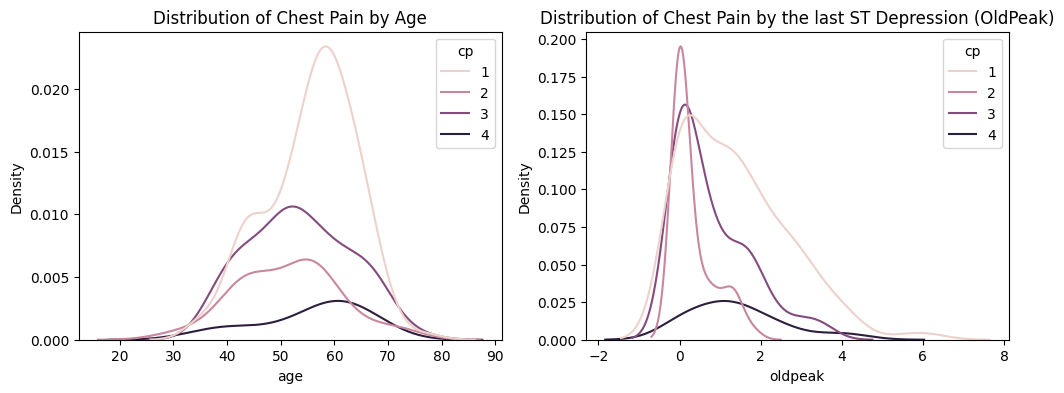

In [15]:
df = data.copy()
df['sex'] = df['sex'].map({1: 'Male', 0:'No'})
df['cp'] = df['cp'].map({0: 1, 1: 2, 2: 3, 3: 4})

plt.figure(figsize=(12,4))

ax=plt.subplot(121)
sns.kdeplot(data=df, x='age', hue='cp')
ax.set_title('Distribution of Chest Pain by Age')

ax=plt.subplot(122)
sns.kdeplot(data=df, x='oldpeak', hue='cp')
ax.set_title('Distribution of Chest Pain by the last ST Depression (OldPeak)')



We can see that the most common Chest Pain is category 1, the lowest, and is most common around the age of 60. <br>
Also we can see that most ST Depressions occur between 0 and 1, and the most common chest pain is category 2

### Classification Models

In [87]:
X = data.drop('target', axis=1)
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=rs)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_smo, y_smo, X_under, y_under = resample(X_train, y_train)

lr_results = []
rf_results = []
knn_results = []
lscv_results = []
results = []

### Logistic Regression

#### Plain Logistic Regression

In [89]:
lr_model = LogisticRegression(random_state = rs, max_iter = 1000, class_weight = None, penalty = 'l2')
lr_model= lr_model.fit(X_train, y_train)
preds = lr_model.predict(X_test)
print('LOGISTIC REGRESSION')
result = evaluate(y_test, preds)
lr_results.append(result)
result

LOGISTIC REGRESSION


{'type': 'Original',
 'accuracy': 0.8524590163934426,
 'recall': np.float64(0.9090909090909091),
 'auc': np.float64(0.8474025974025974),
 'precision': np.float64(0.8333333333333334),
 'fscore': np.float64(0.9059233449477352)}

#### Weighted Logistic Regression

In [29]:
grid_search_lr(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'class_weight': {0: 0.3, 1: 0.7}}

In [90]:
lr_model = LogisticRegression(random_state = rs, max_iter = 1000, class_weight = {0: 0.3, 1: 0.7}, penalty = 'l2')
lr_model= lr_model.fit(X_train, y_train)
preds = lr_model.predict(X_test)
result = evaluate(y_test, preds, 'Weighted')
lr_results.append(result)
result

{'type': 'Weighted',
 'accuracy': 0.819672131147541,
 'recall': np.float64(0.9393939393939394),
 'auc': np.float64(0.808982683982684),
 'precision': np.float64(0.775),
 'fscore': np.float64(0.9317919075144508)}

#### Weighted SMOTE Logistic Regression

In [31]:
grid_search_lr(X_smo, y_smo)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'class_weight': {0: 0.3, 1: 0.7}}

In [91]:
lr_model_smo = LogisticRegression(random_state = rs, max_iter = 1000, class_weight = {0: 0.3, 1: 0.7}, penalty = 'l2')
lr_model_smo= lr_model_smo.fit(X_smo, y_smo)
preds_smo = lr_model_smo.predict(X_test)

print('LOGISTIC REGRESSION SMOTE WEIGHTED')
result = evaluate(y_test, preds_smo, 'SMOTE')
lr_results.append(result)
result

LOGISTIC REGRESSION SMOTE WEIGHTED


{'type': 'SMOTE',
 'accuracy': 0.819672131147541,
 'recall': np.float64(0.9393939393939394),
 'auc': np.float64(0.808982683982684),
 'precision': np.float64(0.775),
 'fscore': np.float64(0.9317919075144508)}

#### Weighted Undersampled Logistic Regression

In [33]:
grid_search_lr(X_under, y_under)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'class_weight': {0: 0.5, 1: 0.5}}

In [97]:
lr_model_und = LogisticRegression(random_state = rs, max_iter = 1000, class_weight = {0: 0.5, 1: 0.5}, penalty = 'l2')
lr_model_und.fit(X_under, y_under)
preds_under = lr_model_und.predict(X_test)

print('LOGISTIC REGRESSION UNDERSAMPLING WEIGHTED')
result = evaluate(y_test, preds_under, 'Undersampling')
lr_results.append(result)
result

LOGISTIC REGRESSION UNDERSAMPLING WEIGHTED


{'type': 'Undersampling',
 'accuracy': 0.8360655737704918,
 'recall': np.float64(0.8787878787878788),
 'auc': np.float64(0.8322510822510822),
 'precision': np.float64(0.8285714285714286),
 'fscore': np.float64(0.8767441860465116)}

            type  accuracy    recall       auc  precision    fscore
0       Original  0.852459  0.909091  0.847403   0.833333  0.905923
1       Weighted  0.819672  0.939394  0.808983   0.775000  0.931792
2          SMOTE  0.819672  0.939394  0.808983   0.775000  0.931792
3  Undersampling  0.836066  0.878788  0.832251   0.828571  0.876744


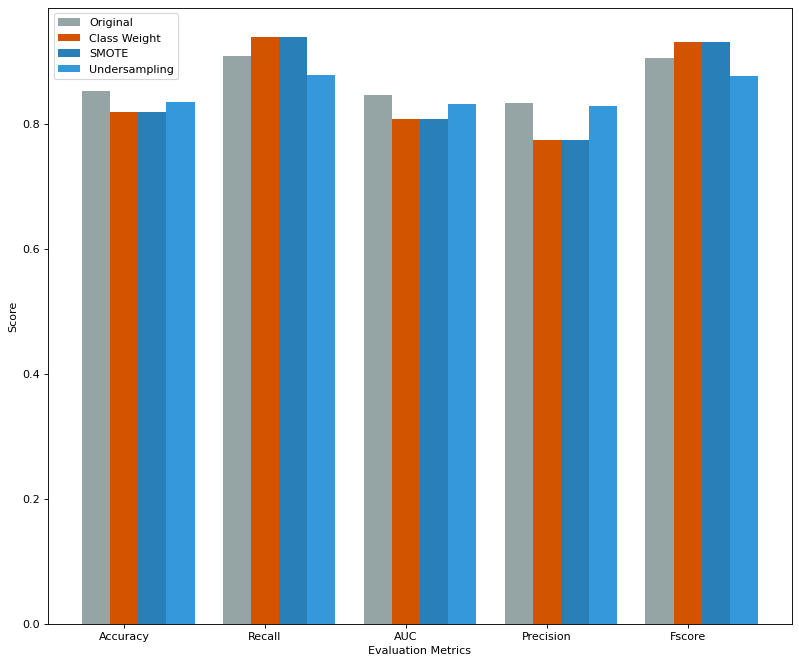

In [95]:
visualize_eval_metrics(lr_results)

Based on the graph and the data, the best Logistic Regression models are the ones with weighted classes and SMOTE

In [129]:
results.append(lr_results[1])

### Random Forest

#### Plain Random Forest

In [98]:
params_grid = {
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [25, 50, 100],
    'min_samples_split': [2, 5],
}
rf_model = RandomForestClassifier(random_state=rs)
grid_search = GridSearchCV(estimator = rf_model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}

In [99]:
rf_model = RandomForestClassifier(random_state = rs, bootstrap=True, class_weight=None, max_depth=5, min_samples_split=5, n_estimators=50)
rf_model = rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

print('RANDOM FOREST')
result = evaluate(y_test, preds)
rf_results.append(result)
result

RANDOM FOREST


{'type': 'Original',
 'accuracy': 0.8360655737704918,
 'recall': np.float64(0.9090909090909091),
 'auc': np.float64(0.8295454545454546),
 'precision': np.float64(0.8108108108108109),
 'fscore': np.float64(0.9048723897911833)}

#### Weighted Random Forest

In [39]:
grid_search_rf(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'class_weight': {0: 0.2, 1: 0.8},
 'max_depth': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [100]:
rf_model = RandomForestClassifier(random_state = rs, bootstrap=True, class_weight={0: 0.2, 1: 0.8}, max_depth=5, min_samples_split=5, n_estimators=50)
rf_model = rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

print('RANDOM FOREST WEIGHTED')
result = evaluate(y_test, preds, 'Weighted')
rf_results.append(result)
result

RANDOM FOREST WEIGHTED


{'type': 'Weighted',
 'accuracy': 0.8360655737704918,
 'recall': np.float64(0.9696969696969697),
 'auc': np.float64(0.8241341991341993),
 'precision': np.float64(0.7804878048780488),
 'fscore': np.float64(0.9607390300230947)}

#### Weighted SMOTE Random Forest

In [41]:
grid_search_rf(X_smo, y_smo)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'class_weight': {0: 0.3, 1: 0.7},
 'max_depth': 10,
 'min_samples_split': 5,
 'n_estimators': 25}

In [101]:
rf_model_smo = RandomForestClassifier(random_state = rs, bootstrap=True, class_weight={0: 0.3, 1: 0.7}, max_depth=10, min_samples_split=5, n_estimators=25)
rf_model_smo = rf_model_smo.fit(X_smo, y_smo)
preds_smo = rf_model_smo.predict(X_test)

print('RANDOM FOREST SMOTE WEIGHTED')
result = evaluate(y_test, preds, 'SMOTE')
rf_results.append(preds_smo)
result

RANDOM FOREST SMOTE WEIGHTED


{'type': 'SMOTE',
 'accuracy': 0.8360655737704918,
 'recall': np.float64(0.9696969696969697),
 'auc': np.float64(0.8241341991341993),
 'precision': np.float64(0.7804878048780488),
 'fscore': np.float64(0.9607390300230947)}

#### Weighted Undersampling Random Forest

In [43]:
grid_search_rf(X_under, y_under)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'class_weight': {0: 0.4, 1: 0.6},
 'max_depth': 15,
 'min_samples_split': 5,
 'n_estimators': 25}

In [102]:
rf_model_under = RandomForestClassifier(random_state = rs, bootstrap=True, class_weight={0: 0.4, 1: 0.6}, max_depth=15, min_samples_split=5, n_estimators=25)
rf_model_under = rf_model_under.fit(X_under, y_under)
preds_under = rf_model_under.predict(X_test)

print('RANDOM FOREST UNDERSAMPLING WEIGHTED')
result = evaluate(y_test, preds, 'Undersampling')
rf_results.append(preds_under)
result

RANDOM FOREST UNDERSAMPLING WEIGHTED


{'type': 'Undersampling',
 'accuracy': 0.8360655737704918,
 'recall': np.float64(0.9696969696969697),
 'auc': np.float64(0.8241341991341993),
 'precision': np.float64(0.7804878048780488),
 'fscore': np.float64(0.9607390300230947)}

            type  accuracy    recall       auc  precision    fscore
0       Original  0.852459  0.909091  0.847403   0.833333  0.905923
1       Weighted  0.819672  0.939394  0.808983   0.775000  0.931792
2          SMOTE  0.819672  0.939394  0.808983   0.775000  0.931792
3  Undersampling  0.836066  0.878788  0.832251   0.828571  0.876744


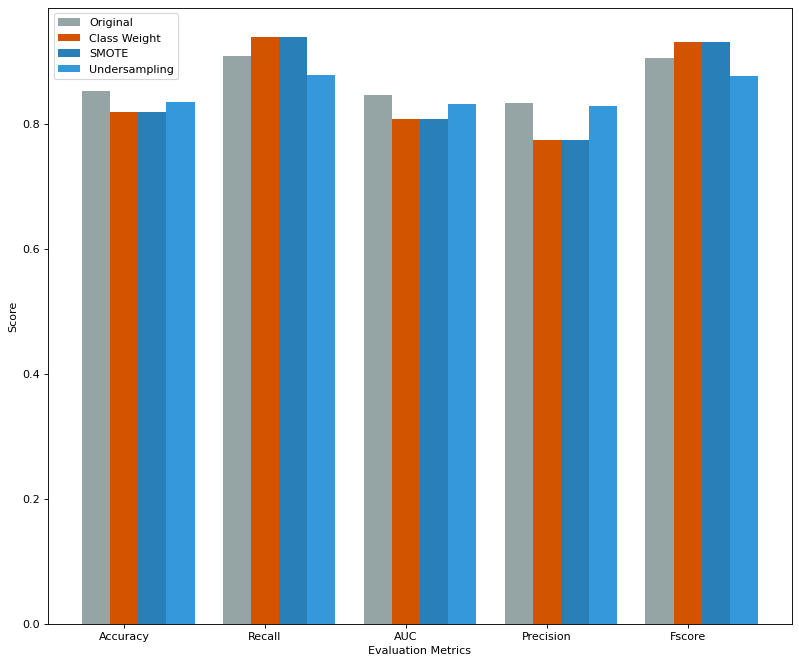

In [103]:
visualize_eval_metrics(lr_results)


Based on the graph and the data, the best Logistic Regression models are the ones with weighted classes and SMOTE

In [130]:
results.append(rf_results[1])

### LinearSCV

#### Plain LinearSCV

In [59]:
params_grid = {
        'penalty': ['l1', 'l2'],
        'C': [1, 3, 5, 7, 9, 10, 12, 15],
    }
    
lscv_model = LinearSVC(random_state=rs, max_iter=2000)
grid_search = GridSearchCV(estimator=lscv_model,
                                param_grid=params_grid,
                                scoring='f1',
                                cv=5, verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'C': 1, 'penalty': 'l2'}

In [120]:
lscv_results = []

In [121]:
lscv_model = LinearSVC(C=1, class_weight=None, penalty='l2')
lscv_model = lscv_model.fit(X_train, y_train)
preds_lscv = lscv_model.predict(X_test)

print('LINEAR SCV')
result = evaluate(y_test, preds_lscv)
lscv_results.append(result)
result

LINEAR SCV


{'type': 'Original',
 'accuracy': 0.8688524590163934,
 'recall': np.float64(0.9393939393939394),
 'auc': np.float64(0.8625541125541125),
 'precision': np.float64(0.8378378378378378),
 'fscore': np.float64(0.9350348027842227)}

#### Weighted LinearSCV

In [61]:
grid_seacrh_lsvc(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'C': 1, 'class_weight': {0: 0.3, 1: 0.7}, 'penalty': 'l2'}

In [122]:
lscv_model = LinearSVC(C=1, class_weight={0: 0.3, 1: 0.7}, penalty='l2')
lscv_model = lscv_model.fit(X_train, y_train)
preds_lscv = lscv_model.predict(X_test)

print('LINEAR SCV WEIGHTED')
result = evaluate(y_test, preds_lscv, 'Weighted')
lscv_results.append(result)
result

LINEAR SCV WEIGHTED


{'type': 'Weighted',
 'accuracy': 0.819672131147541,
 'recall': np.float64(0.9393939393939394),
 'auc': np.float64(0.808982683982684),
 'precision': np.float64(0.775),
 'fscore': np.float64(0.9317919075144508)}

#### Weighted SMOTE LinearSCV

In [67]:
grid_seacrh_lsvc(X_smo, y_smo)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'C': 1, 'class_weight': {0: 0.3, 1: 0.7}, 'penalty': 'l1'}

In [123]:
lscv_model = LinearSVC(C=1, class_weight={0: 0.3, 1: 0.7}, penalty='l1')
lscv_model = lscv_model.fit(X_smo, y_smo)
preds_lscv = lscv_model.predict(X_test)

print('LINEAR SCV SMOTE WEIGHTED')
result = evaluate(y_test, preds_lscv, 'SMOTE')
lscv_results.append(result)
result

LINEAR SCV SMOTE WEIGHTED


{'type': 'SMOTE',
 'accuracy': 0.819672131147541,
 'recall': np.float64(0.9393939393939394),
 'auc': np.float64(0.808982683982684),
 'precision': np.float64(0.775),
 'fscore': np.float64(0.9317919075144508)}

#### Weighted Undersampling LinearSCV

In [69]:
grid_seacrh_lsvc(X_under, y_under)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'C': 1, 'class_weight': {0: 0.3, 1: 0.7}, 'penalty': 'l1'}

In [124]:
lscv_model = LinearSVC(C=1, class_weight={0: 0.3, 1: 0.7}, penalty='l1')
lscv_model = lscv_model.fit(X_under, y_under)
preds_lscv = lscv_model.predict(X_test)

print()
print('LINEAR SCV UNDERSAMPLING WEIGHTED')
result = evaluate(y_test, preds_lscv, 'Undersampling')
lscv_results.append(result)
result


LINEAR SCV UNDERSAMPLING WEIGHTED


{'type': 'Undersampling',
 'accuracy': 0.8360655737704918,
 'recall': np.float64(0.9393939393939394),
 'auc': np.float64(0.8268398268398269),
 'precision': np.float64(0.7948717948717948),
 'fscore': np.float64(0.9328703703703703)}

            type  accuracy    recall       auc  precision    fscore
0       Original  0.868852  0.939394  0.862554   0.837838  0.935035
1       Weighted  0.819672  0.939394  0.808983   0.775000  0.931792
2          SMOTE  0.819672  0.939394  0.808983   0.775000  0.931792
3  Undersampling  0.836066  0.939394  0.826840   0.794872  0.932870


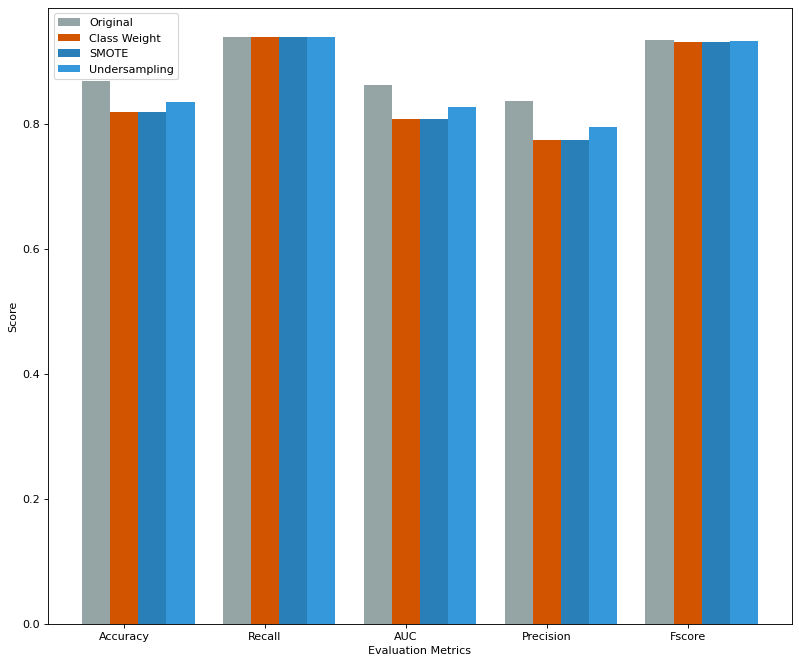

In [125]:
visualize_eval_metrics(lscv_results)

Based on the graph and data we can see that the recall is the same in all the cases, the f1 score is pretty similar with all of them, so based on the other metrics the plain LinearSCV is the best one

In [131]:
results.append(lscv_results[0])

### Key Findings

       type  accuracy    recall       auc  precision    fscore
0  Weighted  0.819672  0.939394  0.808983   0.775000  0.931792
1  Weighted  0.836066  0.969697  0.824134   0.780488  0.960739
2  Original  0.868852  0.939394  0.862554   0.837838  0.935035


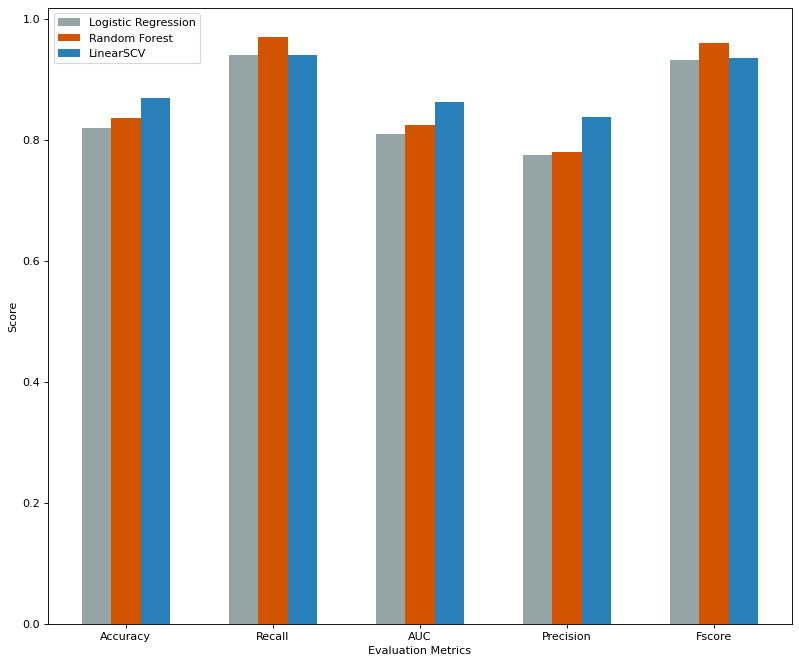

In [136]:
df = pd.DataFrame(data=results)
#table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
#                columns=['type'])
#df = df.set_index('type').transpose()
print(df)
x = np.arange(5)
logistic = df.iloc[0, 1:].values
random_forest = df.iloc[1, 1:].values
linearscv = df.iloc[2, 1:].values
width = 0.2
plt.figure(figsize=(12, 10), dpi=80)
plt.bar(x-0.2, logistic, width, color='#95a5a6')
plt.bar(x, random_forest, width, color='#d35400')
plt.bar(x+0.2, linearscv, width, color='#2980b9')

plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'Fscore'])
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.legend(["Logistic Regression", "Random Forest", "LinearSCV"])
plt.show()

We are comparing the best configuration for each model we explore, and based on the data and graph we can conclude a plain LinearSCV is best best model overall, or at least the one most consistent, even if Random Forest has a better recall and Fscore, LinearCSV still has a good 93.9 and 93.5 in the respectives metrics and a better accuracy, AUC and precision

## Possible Flaws

The dataset could be revisited applying new different models like Ada Boost or Gradient boos, we could also check if stacking models could improve the metrics